In [58]:
import warnings 
warnings.filterwarnings('ignore')

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("C:/damida/bigcontest_ensemble/preprocessing/bigcontest.csv")
df= data.copy() #원본 둔 채 copydata 생성

In [60]:
cthall = df[ df['place'] == '콘서트홀' ]
cthall # concerthall 에서 한 공연만 가지고 dataframe 생성

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,...,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,place,running_time,intermission,member_yn
0,50.0,F,골드,무료,그린,NaN,NaN,NaN,20220114,1512,...,2,일반,302,20220114.0,20220115.0,교향곡,콘서트홀,120,15,Y
4,50.0,M,무료,NaN,NaN,NaN,NaN,NaN,20220206,1615,...,0,일반,897,20220109.0,20220110.0,독주,콘서트홀,90,0,Y
5,30.0,F,블루,무료,NaN,NaN,NaN,NaN,20181124,1145,...,2,블루회원 할인20%,528,20181119.0,20181119.0,교향곡,콘서트홀,100,15,Y
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20191020,1459,...,0,초대권,44,NaN,20191023.0,교향곡,콘서트홀,100,15,N
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20190613,954,...,0,초대권,827,20190602.0,20190602.0,교향곡,콘서트홀,120,20,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920853,60.0,F,무료,그린,NaN,NaN,NaN,NaN,20210618,1509,...,2,일반,887,20210618.0,20210620.0,교향곡,콘서트홀,110,20,Y
1920855,50.0,M,무료,NaN,NaN,NaN,NaN,NaN,20230522,1729,...,0,일반,2825,20230505.0,20230507.0,교향곡,콘서트홀,120,15,Y
1920856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20201009,1652,...,0,초대권,77,NaN,20200920.0,클래식,콘서트홀,120,15,N
1920858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200726,1655,...,0,기획사판매,850,20200719.0,20200720.0,합창,콘서트홀,110,15,N


In [61]:
cthall_unique = cthall[ (cthall['ticket_cancel']==0) ]

cthall = cthall[ (cthall['ticket_cancel']==0) & (cthall['price'] != 0) ]
cthall

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,...,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,place,running_time,intermission,member_yn
4,50.0,M,무료,NaN,NaN,NaN,NaN,NaN,20220206,1615,...,0,일반,897,20220109.0,20220110.0,독주,콘서트홀,90,0,Y
9,NaN,F,블루,무료,NaN,NaN,NaN,NaN,20190703,908,...,0,일반,1528,NaN,20190413.0,클래식,콘서트홀,100,15,N
11,50.0,F,무료,NaN,NaN,NaN,NaN,NaN,20191005,1417,...,0,K-lang 멤버십 회원(1인2매)20%,315,NaN,20191005.0,오페라,콘서트홀,120,15,Y
16,30.0,F,무료,그린,NaN,NaN,NaN,NaN,20230224,2214,...,0,일반,1684,20230218.0,20230219.0,합창,콘서트홀,100,15,Y
18,70.0,M,골드,무료,NaN,NaN,NaN,NaN,20191220,1106,...,0,골드회원 할인30%,76,20191220.0,20191223.0,클래식,콘서트홀,120,15,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920834,30.0,F,무료,그린,NaN,NaN,NaN,NaN,20191206,1102,...,0,싹딜가(그린)50%,1170,20191101.0,20191104.0,교향곡,콘서트홀,120,15,Y
1920843,60.0,F,골드,무료,NaN,NaN,NaN,NaN,20181223,1227,...,0,일반,282,NaN,20181202.0,교향곡,콘서트홀,120,15,Y
1920849,30.0,F,무료,NaN,NaN,NaN,NaN,NaN,20230516,1743,...,0,일반,1666,20230317.0,20230318.0,실내악,콘서트홀,85,15,Y
1920855,50.0,M,무료,NaN,NaN,NaN,NaN,NaN,20230522,1729,...,0,일반,2825,20230505.0,20230507.0,교향곡,콘서트홀,120,15,Y


In [62]:
cthall['floor'] = cthall['seat'].str.split(' ').str[0]
cthall['zone'] = cthall['seat'].str.split(' ').str[1].str[:3]
cthall['col'] = cthall['seat'].str.split(' ').str[1].str[3:]

cthall_unique['floor'] = cthall_unique['seat'].str.split(' ').str[0]
cthall_unique['zone'] = cthall_unique['seat'].str.split(' ').str[1].str[:3]
cthall_unique['col'] = cthall_unique['seat'].str.split(' ').str[1].str[3:]

In [63]:
# discount_type 전처리
#새로운 column
# - column명 : discount
# - %앞의 숫자 : %앞의 수
# - 2+1 : -21
# - 결츨값 : -10
cthall['discount'] = cthall['discount_type'].str.extract('([0-9]+)\%')

cthall.loc[(~cthall['discount_type'].str.contains('%')) & (cthall['discount_type'].str.contains('특별할인')) & \
           (~(cthall['discount_type'].str.contains('기획사'))),'discount'] = -21

cthall['discount'] = cthall['discount'].fillna('-10')



cthall_unique['discount'] = cthall_unique['discount_type'].str.extract('([0-9]+)\%')

cthall_unique.loc[(~cthall_unique['discount_type'].str.contains('%')) & (cthall_unique['discount_type'].str.contains('특별할인')) & \
           (~(cthall_unique['discount_type'].str.contains('기획사'))),'discount'] = -21

cthall_unique['discount'] = cthall_unique['discount'].fillna('-10')

In [64]:
# discount를 사용하여 원가격복구
# - discount가 숫자
#   - 역수를 사용하여 원가격으로 복구
# - discount가 투플원
#   - 기존가격의 2/3 
cthall[cthall['discount']==-21][['performance_code','discount','price']].sort_values(['performance_code','price'])

cthall_unique[cthall_unique['discount']==-21][['performance_code','discount','price']].sort_values(['performance_code','price'])

,performance_code,discount,price
84003,1283,-21,25000
104192,1283,-21,25000
263957,1283,-21,25000
733908,1283,-21,25000
818118,1283,-21,25000
1014441,1283,-21,25000
1328036,1283,-21,25000
1544147,1283,-21,25000
1546098,1283,-21,25000
1705943,1283,-21,25000


In [65]:
# 원가격 복구를 위한 함수
from fractions import Fraction # 분수 표현식
import numpy as np
def ori_price(df):
    if df["discount"] == -10:
        return df['price']
    elif df["discount"] == -21:
        return df['price'] * float(Fraction(2, 3))
    else:
        return df['price'] *np.reciprocal(1-(int(df["discount"])/100))

In [66]:
#원가격복구
cthall['ori_price'] = cthall.apply(ori_price , axis=1)

#원가격복구
cthall_unique['ori_price'] = cthall_unique.apply(ori_price , axis=1)

In [67]:
# 코로나시즌 나누기

def covid_sep(df):
    if 20200816<= df["tran_date"] <= 20211003 :
        return 1
    else:
        return 0

cthall['covid_sep'] = cthall.apply(covid_sep, axis=1)
cthall_unique['covid_sep'] = cthall_unique.apply(covid_sep, axis=1)

In [68]:
# datetype 변경

cthall['tran_date'] = pd.to_datetime(cthall['tran_date'],format='%Y%m%d')
cthall['pre_open_date'] = pd.to_datetime(cthall['pre_open_date'],format='%Y%m%d')
cthall['open_date'] = pd.to_datetime(cthall['open_date'],format='%Y%m%d')


# datetype 변경

cthall_unique['tran_date'] = pd.to_datetime(cthall_unique['tran_date'],format='%Y%m%d')
cthall_unique['pre_open_date'] = pd.to_datetime(cthall_unique['pre_open_date'],format='%Y%m%d')
cthall_unique['open_date'] = pd.to_datetime(cthall_unique['open_date'],format='%Y%m%d')

In [69]:
cthall = cthall.drop(['age', 'gender','membership_type_1', 'membership_type_2','membership_type_3',\
                      'membership_type_4','membership_type_5', 'membership_type_6','ticket_cancel',\
                      'discount_type','place','intermission', 'discount'], axis=1)
#ticket_cancel과 discount_type은 원데이터 전처리에서 컬럼제거를 할 것인가?


cthall_unique = cthall_unique.drop(['age', 'gender','membership_type_1', 'membership_type_2','membership_type_3',\
                      'membership_type_4','membership_type_5', 'membership_type_6','ticket_cancel',\
                      'discount_type','place','intermission', 'discount'], axis=1)
#ticket_cancel과 discount_type은 원데이터 전처리에서 컬럼제거를 할 것인가?

In [70]:
cthall.groupby('play_st_time').mean('ori_price')['ori_price']

play_st_time
1100    24377.580382
1400    63164.188772
1500    64644.778437
1630    53752.171395
1700    68574.523202
1800    40389.610390
1900    71705.096557
1930    76057.156851
2000    62708.017419
Name: ori_price, dtype: float64

<Axes: xlabel='play_st_time'>

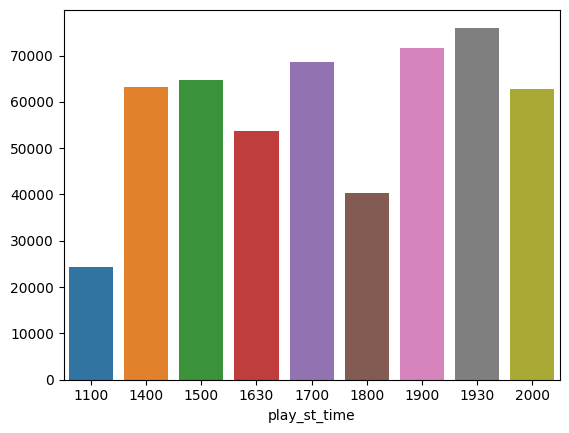

In [71]:
import seaborn as sns

#시간대별 가격
sns.barplot(x = cthall.groupby('play_st_time').mean('ori_price')['ori_price'].index, y = cthall.groupby('play_st_time').mean('ori_price')['ori_price'].values)

<Axes: xlabel='play_st_time'>

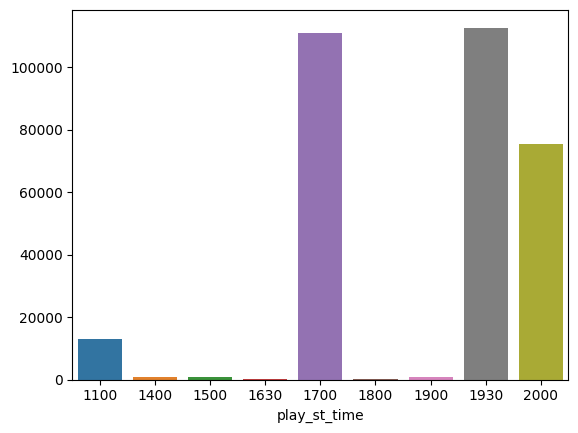

In [82]:
# 시간대별 관객, (not price zero)
sns.barplot(x = cthall.groupby('play_st_time').count()['seat'].index, y = cthall.groupby('play_st_time').count()['seat'].values)

In [86]:
cthall_group_time_pf = cthall.groupby(['play_st_time','performance_code'],as_index=False).count()
cthall_group_time_pf

,play_st_time,performance_code,tran_date,tran_time,play_date,seat,price,pre_open_date,open_date,genre,running_time,member_yn,floor,zone,col,ori_price,covid_sep
0,1100,352,1111,1111,1111,1111,1111,1111,1111,0,1111,1111,1111,1111,1111,1111,1111
1,1100,353,1180,1180,1180,1180,1180,1180,1180,1180,1180,1180,1180,1180,1180,1180,1180
2,1100,354,748,748,748,748,748,748,748,0,748,748,748,748,748,748,748
3,1100,1497,1498,1498,1498,1498,1498,1498,1498,1498,1498,1498,1498,1498,1498,1498,1498
4,1100,1498,1724,1724,1724,1724,1724,1724,1724,1724,1724,1724,1724,1724,1724,1724,1724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,2000,2762,16,16,16,16,16,0,16,16,16,16,16,16,16,16,16
669,2000,2776,18,18,18,18,18,0,18,18,18,18,18,18,18,18,18
670,2000,2791,41,41,41,41,41,0,41,41,41,41,41,41,41,41,41
671,2000,2920,390,390,390,390,390,0,390,390,390,390,390,390,390,390,390


In [87]:
cthall_group_time_pf.groupby('play_st_time').count().index

,performance_code,tran_date,tran_time,play_date,seat,price,pre_open_date,open_date,genre,running_time,member_yn,floor,zone,col,ori_price,covid_sep
play_st_time,,,,,,,,,,,,,,,,
1100,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
1400,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1500,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1630,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1700,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209
1800,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1900,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
1930,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260
2000,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181


<Axes: xlabel='play_st_time', ylabel='performance_code'>

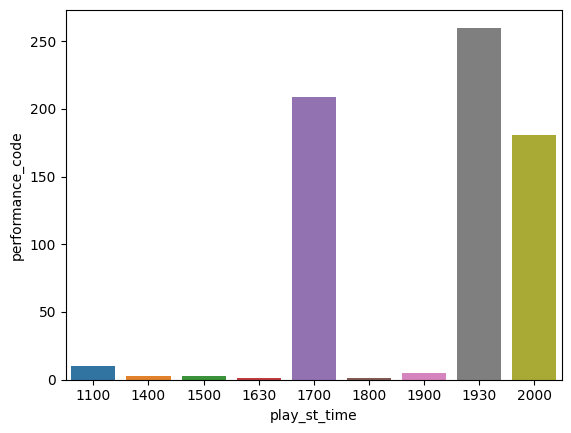

In [88]:
#시간대별 공연의 수
sns.barplot(x = cthall_group_time_pf.groupby('play_st_time').count().index , y = cthall_group_time_pf.groupby('play_st_time').count()['performance_code'])

In [89]:
cthall_group_genre_pf = cthall.groupby(['genre','performance_code'],as_index=False).count()
cthall_group_genre_pf

,genre,performance_code,tran_date,tran_time,play_date,play_st_time,seat,price,pre_open_date,open_date,running_time,member_yn,floor,zone,col,ori_price,covid_sep
0,가족극,1429,24,24,24,24,24,24,0,24,24,24,24,24,24,24,24
1,교향곡,7,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46
2,교향곡,23,643,643,643,643,643,643,0,643,643,643,643,643,643,643,643
3,교향곡,44,1606,1606,1606,1606,1606,1606,1606,1606,1606,1606,1606,1606,1606,1606,1606
4,교향곡,68,450,450,450,450,450,450,450,450,450,450,450,450,450,450,450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,합창,2640,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
642,합창,2641,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
643,합창,2642,10,10,10,10,10,10,0,10,10,10,10,10,10,10,10
644,합창,2762,16,16,16,16,16,16,0,16,16,16,16,16,16,16,16


In [94]:
cthall_group_genre_pf.groupby('genre').count()

,performance_code,tran_date,tran_time,play_date,play_st_time,seat,price,pre_open_date,open_date,running_time,member_yn,floor,zone,col,ori_price,covid_sep
genre,,,,,,,,,,,,,,,,
가족극,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
교향곡,317,317,317,317,317,317,317,317,317,317,317,317,317,317,317,317
기타,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
독주,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38
복합장르,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
성악,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29
실내악,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25
오페라,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
재즈,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


<Axes: xlabel='genre', ylabel='performance_code'>

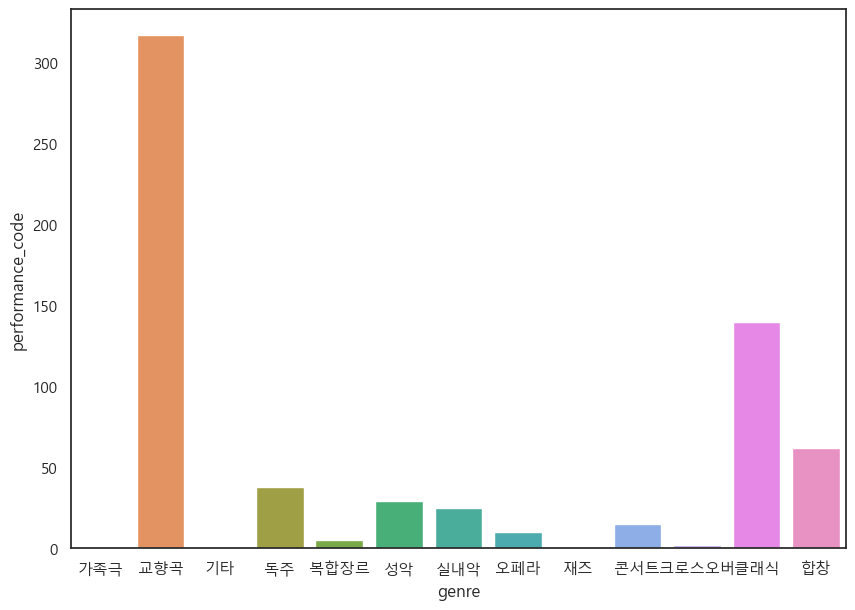

In [98]:
# 장르별 공연 수
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')
plt.figure(figsize=(10, 7))

sns.barplot(x = cthall_group_genre_pf.groupby('genre').count().index , y = cthall_group_genre_pf.groupby('genre').count()['performance_code'])

In [99]:
cthall

,tran_date,tran_time,play_date,play_st_time,seat,price,performance_code,pre_open_date,open_date,genre,running_time,member_yn,floor,zone,col,ori_price,covid_sep
4,2022-02-06,1615,20220302,1930,1층 B블록12열 7,180000,897,2022-01-09,2022-01-10,독주,90,Y,1층,B블록,12열,163636.363636,0
9,2019-07-03,908,20190721,1700,1층 C블록17열 3,75000,1528,NaT,2019-04-13,클래식,100,N,1층,C블록,17열,68181.818182,0
11,2019-10-05,1417,20191201,1700,3층 BOX9 5,24000,315,NaT,2019-10-05,오페라,120,Y,3층,BOX,9,30000.000000,0
16,2023-02-24,2214,20230412,1930,1층 C블록2열 2,130000,1684,2023-02-18,2023-02-19,합창,100,Y,1층,C블록,2열,118181.818182,0
18,2019-12-20,1106,20200211,1930,2층 BOX2 2,42000,76,2019-12-20,2019-12-23,클래식,120,Y,2층,BOX,2,60000.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920834,2019-12-06,1102,20191222,1700,2층 A블록5열 5,40000,1170,2019-11-01,2019-11-04,교향곡,120,Y,2층,A블록,5열,80000.000000,0
1920843,2018-12-23,1227,20190531,2000,3층 N블록1열 8,10000,282,NaT,2018-12-02,교향곡,120,Y,3층,N블록,1열,9090.909091,0
1920849,2023-05-16,1743,20230603,1700,3층 D블록6열 6,40000,1666,2023-03-17,2023-03-18,실내악,85,Y,3층,D블록,6열,36363.636364,0
1920855,2023-05-22,1729,20230613,1700,3층 A블록6열 4,10000,2825,2023-05-05,2023-05-07,교향곡,120,Y,3층,A블록,6열,9090.909091,0
